[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

In [ ]:
df=pd.read_csv("/content/athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Don't forget to drop duplicates first

In [ ]:
df.drop_duplicates(inplace=True)

# <font color='red'>**Beginner level**</font>

### Find the missing data in each column

In [ ]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

### Number of males and females

In [ ]:
df["Sex"].value_counts()

M    195353
F     74378
Name: Sex, dtype: int64

### How many cities do we have and what are they ?

In [ ]:
print("Number of cities : ,len(df['City'].unique())")
print("The names of cities are:", df['City'].unique())

Number of cities : ,len(df['City'].unique())
The names of cities are: ['Barcelona' 'London' 'Antwerpen' 'Paris' 'Calgary' 'Albertville'
 'Lillehammer' 'Los Angeles' 'Salt Lake City' 'Helsinki' 'Lake Placid'
 'Sydney' 'Atlanta' 'Stockholm' 'Sochi' 'Nagano' 'Torino' 'Beijing'
 'Rio de Janeiro' 'Athina' 'Squaw Valley' 'Innsbruck' 'Sarajevo'
 'Mexico City' 'Munich' 'Seoul' 'Berlin' 'Oslo' "Cortina d'Ampezzo"
 'Melbourne' 'Roma' 'Amsterdam' 'Montreal' 'Moskva' 'Tokyo' 'Vancouver'
 'Grenoble' 'Sapporo' 'Chamonix' 'St. Louis' 'Sankt Moritz'
 'Garmisch-Partenkirchen']


# <font color='red'>**Intermediate level**</fond>

 Find the number of athlete for each year

In [ ]:
df["Year"].value_counts()

1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7383
1936     7146
1956     6434
1924     5570
1928     5238
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1994     3160
1908     3069
1932     2817
1900     1898
1906     1733
1904     1301
1896      380
Name: Year, dtype: int64

In [ ]:
# u could use this method
df.groupby('Year')['ID'].count()

Year
1896      380
1900     1898
1904     1301
1906     1733
1908     3069
1912     4040
1920     4292
1924     5570
1928     5238
1932     2817
1936     7146
1948     7383
1952     9358
1956     6434
1960     9235
1964     9480
1968    10479
1972    11959
1976    10502
1980     8937
1984    11588
1988    14676
1992    16413
1994     3160
1996    13780
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
Name: ID, dtype: int64

### Which athlete participated the most? (his/her name and ID)

In [ ]:
most_name= df["Name"].value_counts().idxmax()
most_id = df[df["Name"] == most_name]["ID"].iloc[0]
print(f"the name is {most_name},and his ID is {most_id}")

the name is Heikki Ilmari Savolainen,and his ID is 106296


# <font color='red'>**Advanced level**</fond>

:### Find the number of each medal for each year.
##### The output should look like this
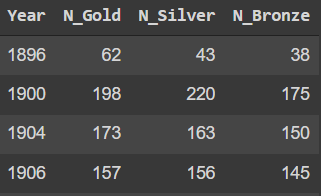

In [ ]:
df1 = df.groupby(['Year', 'Medal']).size().unstack(fill_value=0).reset_index()
df1.columns.name = None
df1.rename(columns={'Gold': 'N_Gold', 'Silver': 'N_Silver', 'Bronze': 'N_Bronze'}, inplace=True)
df1

,Year,N_Bronze,N_Gold,N_Silver
0,1896,38,62,43
1,1900,175,198,220
2,1904,150,173,163
3,1906,145,157,156
4,1908,256,294,281
5,1912,300,326,315
6,1920,367,493,448
7,1924,311,332,319
8,1928,281,275,267
9,1932,232,261,246


# <font color='red'>**You are Geek!**</fond>
### Provide all your answers with plots

### Find the number of winners with the gold medal in each city?

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df2 = df.groupby(['City','Medal']).size().unstack(fill_value=0).reset_index()
df3=df2[['Gold','City']]
df3.columns.name = None
df3

,Gold,City
0,104,Albertville
1,245,Amsterdam
2,493,Antwerpen
3,883,Athina
4,608,Atlanta
5,559,Barcelona
6,671,Beijing
7,312,Berlin
8,87,Calgary
9,55,Chamonix


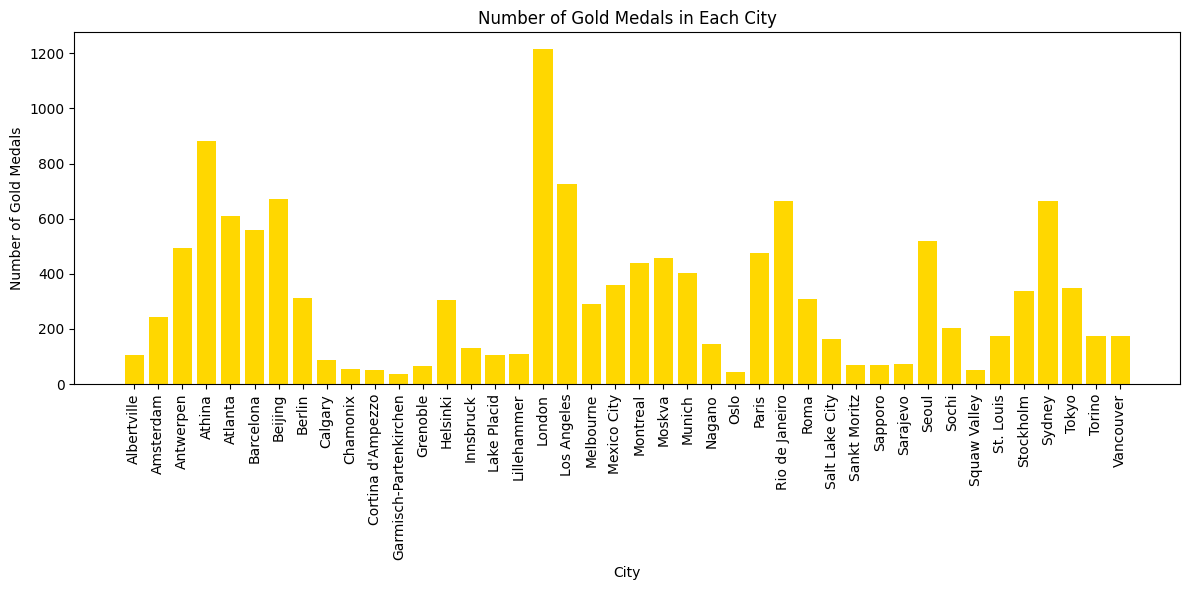

In [ ]:
# Plot the bar plot
plt.figure(figsize=(12, 6))
plt.bar(df3['City'], df3['Gold'], color='gold')
plt.title('Number of Gold Medals in Each City')
plt.xlabel('City')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Find the total missing data for each year?

# <font color='red'>**I dare you to solve this :)**</fond>
### Dont use for loops, and provide all your answers with plots.

### Has the number of athletes changed over time for Summer and Winter?

In [ ]:
summer_df = df[df['Season'] == 'Summer']
winter_df = df[df['Season'] == 'Winter']
summer_athletes_per_year = summer_df.groupby('Year')['Name'].count()
winter_athletes_per_year = winter_df.groupby('Year')['Name'].count()

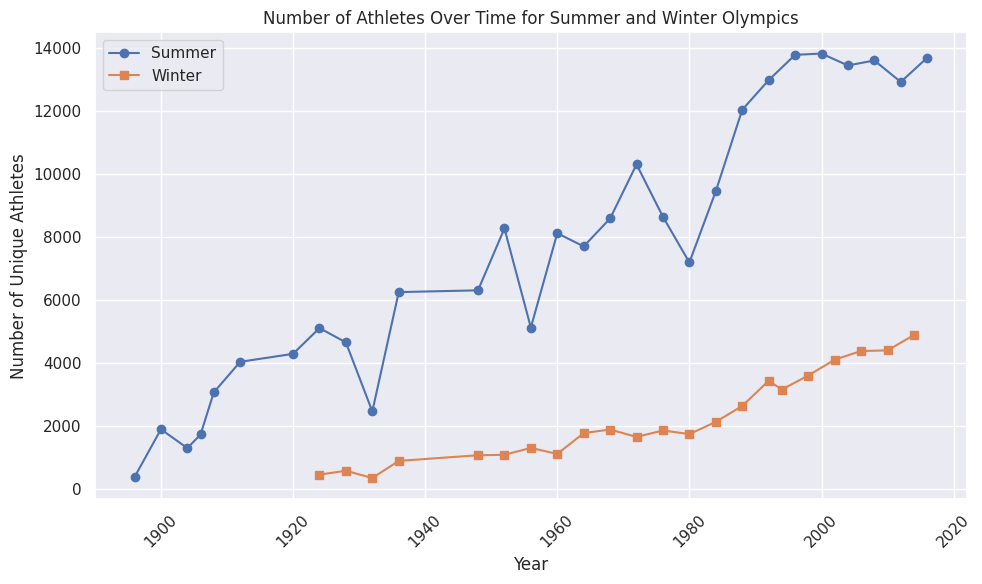

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(summer_athletes_per_year.index, summer_athletes_per_year.values, marker='o', label='Summer')
plt.plot(winter_athletes_per_year.index, winter_athletes_per_year.values, marker='s', label='Winter')
plt.title('Number of Athletes Over Time for Summer and Winter Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Unique Athletes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()